In [96]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [97]:
data = pd.read_csv(r'/home/ali/Downloads/project4/train_u6lujuX_CVtuZ9i (1).csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [99]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [100]:
data.shape

(614, 13)

In [101]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

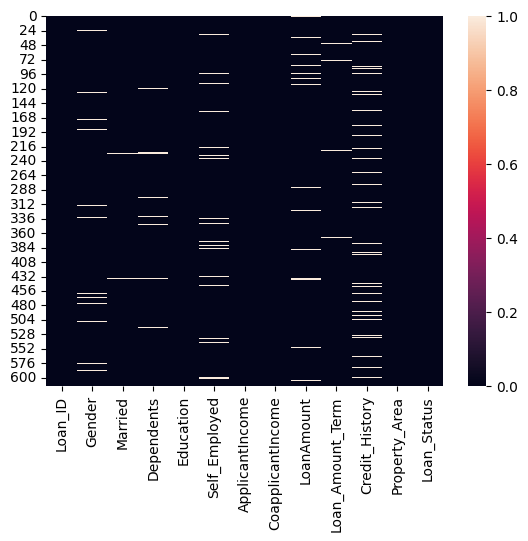

In [102]:
sns.heatmap(data.isnull())

In [103]:
data = data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [104]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

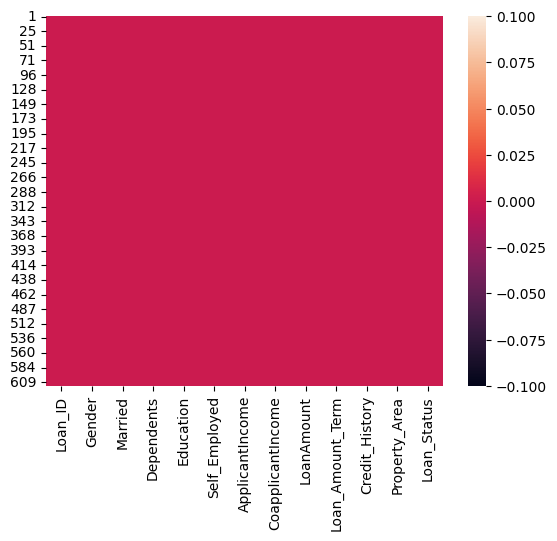

In [105]:
sns.heatmap(data.isnull())


In [106]:
data.Dependents.value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [107]:
data = data.replace('3+', 4)

In [108]:
data.Dependents.value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

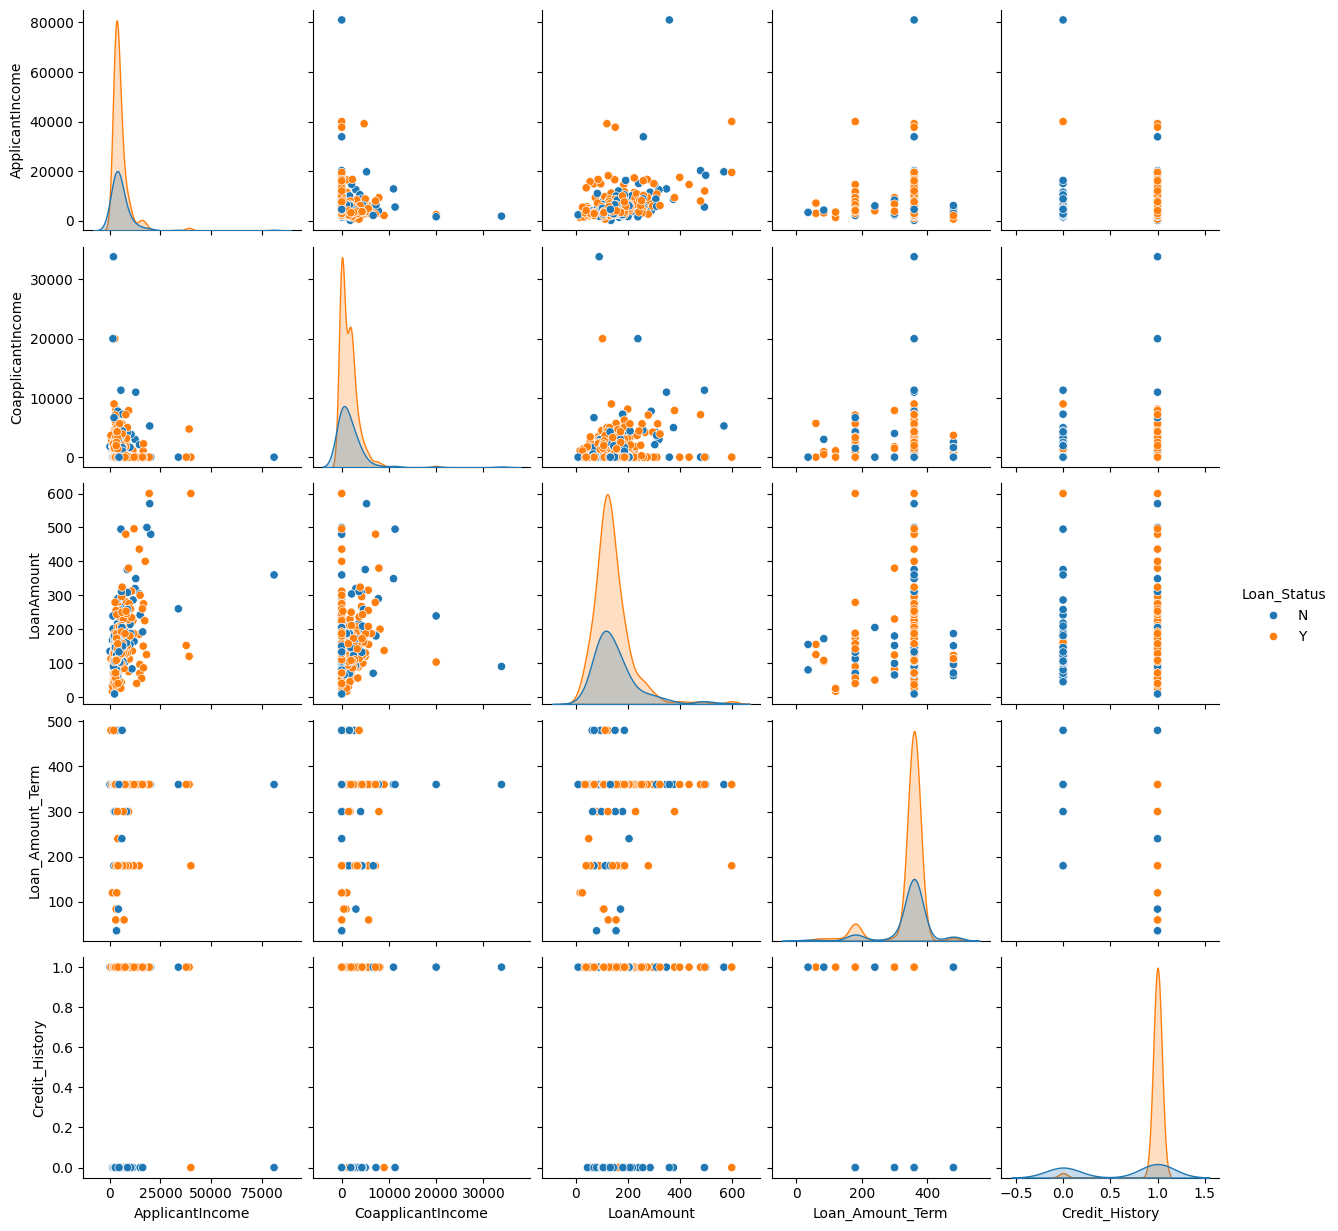

In [109]:
## visualizing Data with seaborn and matplotlib
sns.pairplot(data, hue='Loan_Status')

<Axes: xlabel='Loan_Status', ylabel='count'>

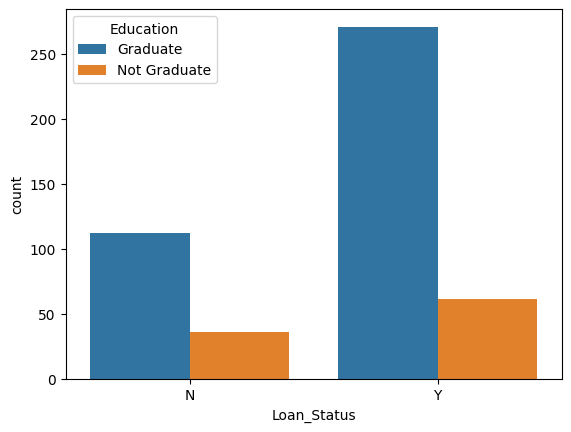

In [110]:
sns.countplot(x='Loan_Status', hue='Education', data=data)

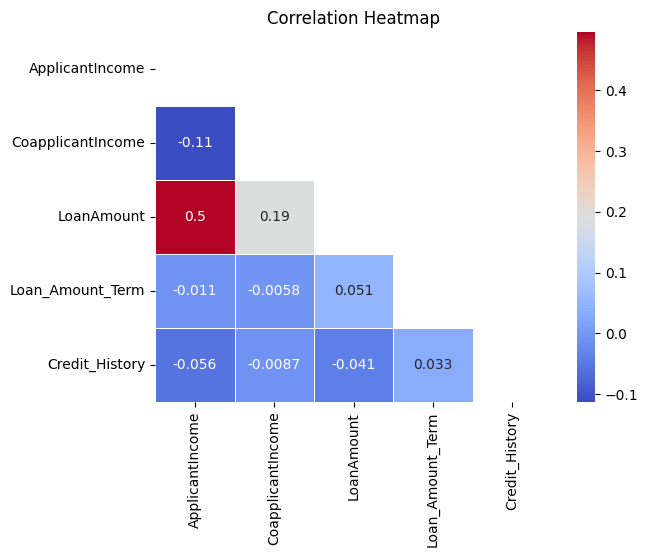

In [111]:
data_int = data.select_dtypes(exclude='object')
mask =  np.triu(data_int.corr())
sns.heatmap(data_int.corr(), annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

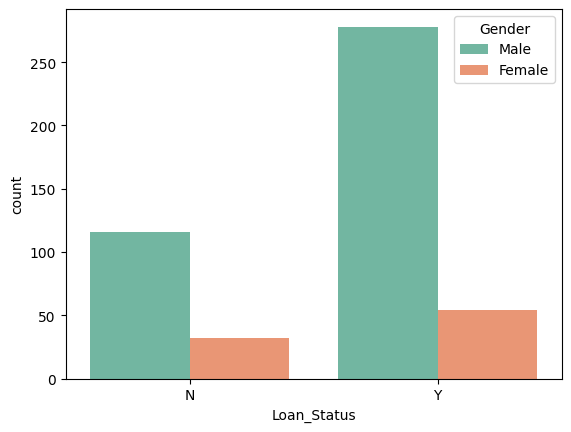

In [112]:
sns.countplot(x='Loan_Status', hue='Gender', data=data, palette='Set2')

In [113]:
data.Gender = data.Gender.replace({'Male': 1, 'Female': 0})
data.Married = data.Married.replace({'Yes': 1, 'No': 0})
data.Dependents = data.Dependents.replace({'0': 0, '1': 1, '2': 2, '3+': 3})
data.Education = data.Education.replace({'Graduate': 1, 'Not Graduate': 0})
data.Self_Employed = data.Self_Employed.replace({'Yes': 1, 'No': 0})
data.Property_Area = data.Property_Area.replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

In [114]:
#modeling
x = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y= data['Loan_Status']  

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=41)

In [116]:
model1 = XGBRegressor()
model2 = SVC()

In [117]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model1.fit(X_train, y_train_encoded)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
predictions = model1.predict(X_test)
predictions 

array([ 1.0161694 ,  0.2557879 ,  0.7462564 ,  0.8129245 ,  0.6680696 ,
        0.78433037,  1.152124  ,  0.878788  ,  1.0484425 ,  0.8961803 ,
        0.9607538 ,  0.47815406,  0.9459169 ,  0.38378516,  1.1084303 ,
        1.0084585 ,  0.17639074,  0.79174066,  1.0357957 ,  0.7959615 ,
        1.1181895 ,  0.92575604,  0.01635051,  0.6183709 ,  0.7674649 ,
        0.8958782 ,  0.87968796,  0.5963954 ,  0.3927816 ,  1.0874274 ,
        0.76351756,  1.1876887 ,  0.00707437,  0.8395516 ,  0.99346405,
       -0.01849751,  0.742606  , -0.01748838,  0.83635646,  0.4127259 ,
        0.069343  ,  1.0718613 ,  0.23443486,  0.54955506,  0.5669217 ,
        0.9409972 ,  0.88737386,  0.71444577], dtype=float32)

In [119]:
y_test_encoded = label_encoder.transform(y_test)
accuracy = accuracy_score(y_test_encoded, predictions.round())
accuracy

0.8541666666666666

In [120]:
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, predictions2)
accuracy2

0.8125

In [121]:
best_accuracey  ={ 'XGBRegressor': accuracy, 'SVC': accuracy2}
print(f"Best model is [{max(best_accuracey, key=best_accuracey.get)}] with accuracy of [{max(best_accuracey.values())}]")

Best model is [XGBRegressor] with accuracy of [0.8541666666666666]
